In [ ]:
!pip install control

     |████████████████████████████████| 348kB 7.5MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344929 sha256=d9adb104fc9e39d12f51a93e6a06028eebfc49fa0d61098ce9022ca722b4259a
  Stored in directory: /root/.cache/pip/wheels/35/be/ee/081b68ca3e4b2d253fba2f7f7e51960373903fb7b6d13c5532
Successfully built control


In [ ]:
import torch
from torch import nn
import torch.optim as optim
import control
import numpy
import matplotlib.pyplot as plt
import numpy as np
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))



Using cuda device


In [ ]:

class PID_Tuner():
  def __init__(self,nom,denom):
  
    self.Plant=control.tf(nom,denom)
    self.parameters = torch.nn.Parameter(torch.randn(3), requires_grad=True)
    self.iterations=10000
    self.optimizer = optim.SGD([self.parameters], lr=0.001, momentum=0.0)
    self.integral=0.0
    self.T = numpy.linspace(0,10,101)
    self.T,self.Y=control.step_response(self.Plant, self.T)
    self.Y=1-self.Y
    self.Yout=[]
    self.print_every=1000


  
  def error(self):
    numerical_parameters=self.parameters.detach().numpy()
    error_val = 0.0
    for t in range (len(self.T)-1):
      pass
      error_array = torch.tensor([self.Y[t],self.It(t),self.dt(t)])
      current_value =torch.sum(torch.mul(self.parameters,error_array)) 
      self.Yout.append(current_value.detach().numpy())
      error_val += torch.abs(current_value)
    return error_val
    

  def dt(self,t):
    
    if t<2 :
      return -11/6*self.Y[t]+3*self.Y[t+1]-3/2*self.Y[t+2]+1/3*self.Y[t+3]

    if t>len(self.T)-3 :
      return 11/6*self.Y[t]-3*self.Y[t-1]+2/3*self.Y[t-2]-1/3*self.Y[t-3]

    return 1/12*self.Y[t-2]-2/3*self.Y[t-1]+2/3*self.Y[t+1]-1/12*self.Y[t+2]
    
  def It(self,t):
    pass
    if t==0:
      return 0
    self.integral += (self.Y[t]+self.Y[t-1])*(self.T[t]-self.T[t-1])/2
    return self.integral

  def tune (self):
    pass
    for iter in range(self.iterations):
      pass
      self.optimizer.zero_grad()
      err = self.error()
      err.backward()
      self.optimizer.step()
      if (iter%self.print_every ==0):
        print( "iteration :" +str(iter)  + ", error : "+ str(err.detach().numpy()))
        self.plot()

      self.integral=0.0
      self.Yout=[]
      
      
    print("optimized values of Pp ="+str(self.parameters.detach().numpy()[0]))
    print("optimized values of Pi ="+str(self.parameters.detach().numpy()[1]))
    print("optimized values of Pd ="+str(self.parameters.detach().numpy()[2]))



  def plot(self):
    plt.ion()
    plt.plot(self.T[:100],self.Yout)
    plt.draw()
    plt.pause(0.0001)
    plt.clf()
  


iteration :0, error : 128.5986635615261


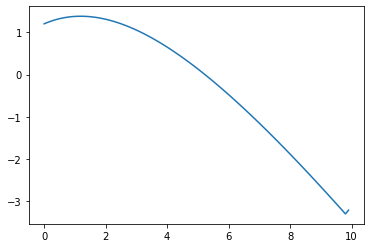

iteration :1000, error : 3.7233802378706655


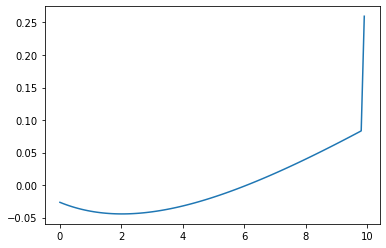

iteration :2000, error : 3.7233802378706655


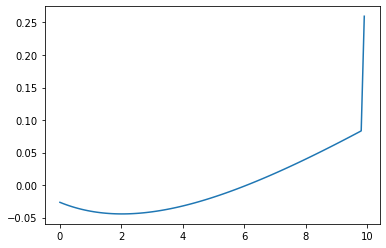

iteration :3000, error : 3.7233802378706655


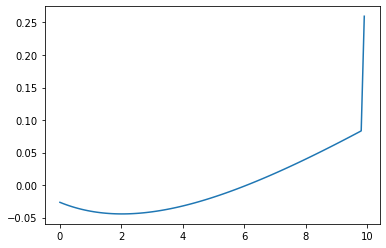

iteration :4000, error : 3.7233802378706655


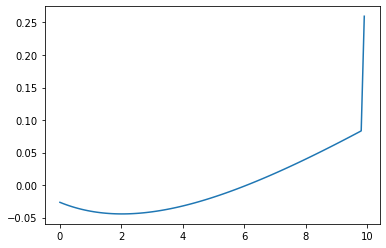

iteration :5000, error : 3.7233802378706655


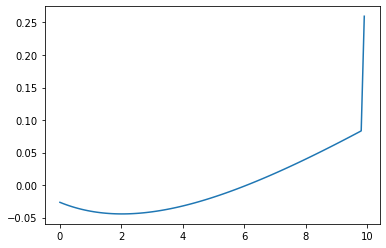

iteration :6000, error : 3.7233802378706655


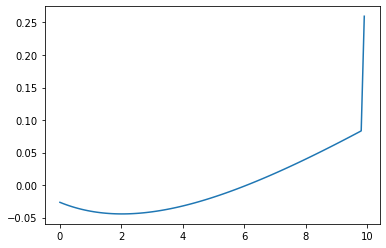

iteration :7000, error : 3.7233802378706655


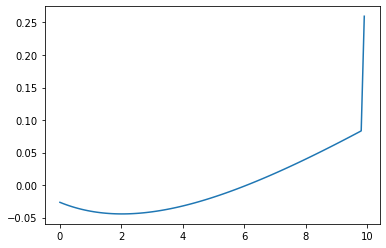

iteration :8000, error : 3.7233802378706655


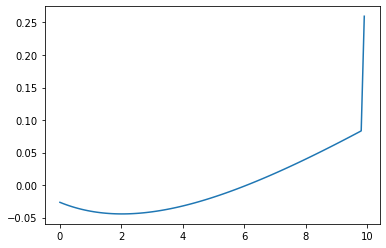

iteration :9000, error : 3.7233802378706655


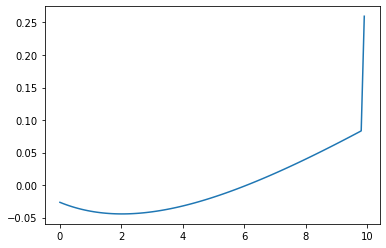

optimized values of Pp =-0.013802549
optimized values of Pi =-0.029329984
optimized values of Pd =0.25325257


<Figure size 432x288 with 0 Axes>

In [ ]:
tuner = PID_Tuner([1],[2,0.5])
tuner.tune()